<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/Day5_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: Fourier-Transform Infrared Spectroscopy continued
MSE 7530, Fall 2025, Wayne State University  
Monday, September 15th, 2025  
Prof. Camille Bishop

### <font color='magenta'> We will be working through this notebook together as a class today. Whatever we do not get to in class, the remainder will be left self-guided as part of Assignment 2. You can be fairly confident that this guided material will come up in the in-class quiz.

## <font color='red'>**(Always Run These First)**</font> Part 0.5: Quick refresher and necessary import cells
Every notebook will generally start with all the necessary import cells in one place; here I will import all packages that we used at once.

In [ ]:
# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Setting up file access to the class GH Repo and your personal Google Drive

In [ ]:
!git clone https://github.com/cbishop4/MSE7530.git
from google.colab import drive
drive.mount('/content/drive')

##  Exercise 1: Calculating "toy" interferograms
Through the following 4 exercises, we will build up the concepts involved in interferograms and Fourier transformed spectra.

### A monochromatic interferogram with arbitrary intensity
<font color='red'><font size=3> Warmup: Calculate the intensity I as a function of $\delta$ (retardation, or difference in path length) for light with $\lambda$ = $2 \mu m$. Take the value $I_{0}$ to be arbitrarily equal to 1. </font></font>  
Note that the cosine function is part of numpy and <font color='blue'> takes inputs and outputs in radians.</font> There are a couple functions you can use to convert between the two. (You may or may not have to do this in this particular case; check if the cosine term is in radians or degrees)

```
np.cos(x) # input and output in radians
np.rad2deg(x) # converts an angle x in radians to degrees
np.radians(x) # converts an angle x in degrees to radians
np.pi # no arguments or parentheses for this; it is just a constant
```
Alternatively to using the function, you can just use the conversion where $\pi~ radians = 180°$.


Guide to the correct steps:  
1) Write a user-defined function that converts $\delta$ and $\lambda$ to Intensity.  
2) Define an evenly spaced numpy array of values of $\delta$ (I recommend values from -20 to 20 $\mu m$.    
3) Use your function to calculate the range of intensities expected.
4) Plot your intensities on the y-axis vs. $\delta$ on the x-axis.

In [ ]:
# Step 1
def Gen_I(delta, wl, I_0):

  I_delta = (I_0/2) *(1 + np.cos((2*np.pi*delta)/wl))
  return I_delta

In [ ]:
# Step 2
# delta = np.linspace(start, stop, num)
deltas = np.linspace(-20,20,1001)

# Step 3
I_delta = Gen_I(deltas, 2, 1)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2753645204.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Retardation $\\delta$ ($\mu$m)')


Text(0, 0.5, 'Intensity')

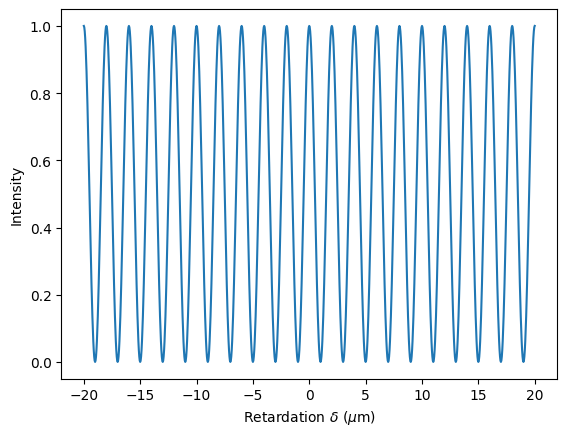

In [ ]:
#step 3
plt.plot(deltas,I_delta)
plt.xlabel('Retardation $\\delta$ ($\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Does this look like the interferogram in the example slides? Why or why not?

The above interferogram was generated from a single wavelength. If you had a monochromatic source, this is what your interferogram would look like. This corresponds to  
<font size=6>$I(\delta) = \frac{I_{0}}{2}[1 + cos(\frac{2\pi \delta}{\lambda})]  $  </font>  
Our case does still satisfy the formula for a total interferogram at multiple wavelengths,  
<font size=6>$I_{T}(\delta) = \sum_{k=1}^{K}{\frac{I_{k,0}}{2}[1 + cos(\frac{2\pi \delta}{\lambda_{k}})]} $,  </font>  
We just simply only have one k (value for wavelength). Next, we will have multiple k's, so the summation will actually be over many terms.

### A polychromatic interferogram with uniform (non-realistic) intensity
I have written this code as there are a few steps that will take a while; part of your homework will be to comment this code to explain what is happening.

In [ ]:
def delta_to_I(deltas,wl,I_0=1):
  return I_0 * 0.5 * (1 + np.cos(2 * np.pi * deltas / wl))

In [ ]:
deltas = np.linspace(-100,100, 1001) # generate many values of retardation (delta)
wl_spectrum = np.linspace(2.5,25,500) # wavelenght ommited by IR source, 500 wavelengths ranging from 2.5 to 25 um (midIR)
interferogram = np.zeros(len(deltas))
for wl in wl_spectrum: # for every wavelength
  single_wl_int = delta_to_I(deltas,wl) #
  interferogram += delta_to_I(deltas,wl) # does this at a differnate wavelength every time it goes through
  interferogram = interferogram + single_wl_int # adds to the total  interferogram

Text(0, 0.5, 'Intensity')

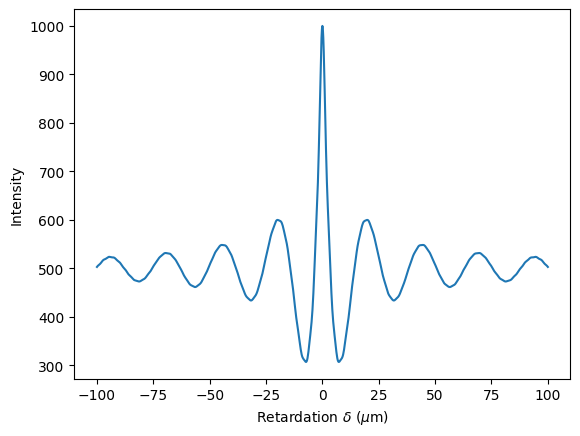

In [ ]:
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\\mu$m)')
plt.ylabel('Intensity')

<font color='red'> Does this look like the interferogram in the example slides? Why or why not?

It doesn't look like the one in the slides - b/c it is an idealise case
I_0 is equal to 0 for every case

The uniformity of the above interferogram is due to the condition that $I_{0}$ is equal to 1 for every wavelength. Now, we will generate a totally random array of $I_0$ values using the np.random() function.

### A polychromatic interferogram with non-uniform (but still not realistic) intensities.

In [ ]:
wl_spectrum = np.linspace(2.5,25,200) # generating the midIR spectrum
I_0s = np.random.rand(len(wl_spectrum)) # here, we generate a random array of identities ( need to be the same - one intersity for each wavelength)
deltas = np.linspace(-100,100, 1001)
interferogram = np.zeros(len(deltas))
i = 0
for wl in wl_spectrum:
  interferogram += delta_to_I(deltas,wl,I_0=I_0s[i])
  i += 1

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1447021025.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Retardation $\\delta$ ($\mu$m)')


Text(0, 0.5, 'Intensity')

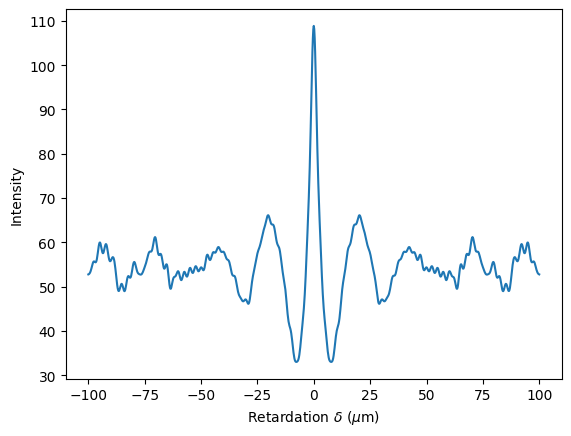

In [ ]:
plt.plot(deltas,interferogram)
plt.xlabel('Retardation $\\delta$ ($\mu$m)')
plt.ylabel('Intensity')
#plt.xlim(-25,25)

### **Importance of $I_{0}$ values**
In the first two sub-exercises, we used $I_{0} = 1$ for every wavelength of IR radiation. In the last of the three, we used random values. However, as we know, the interactions with IR light (which are what we want to measure in the first place) change these. That is why the interferogram generated above looks much more uniform than the real one in the lecture slides.  
In the following exercise, we will use variable $I_{0}$ values, including real experimental ones, and consider a few other practical considerations needed, including *apodization* and *background subtraction*.

## Exercise 2 : Generating more "toy" interferograms.
Here, we are following along to an exercise adapted from B. Shepherd & M.K. Bellamy, *J. Chem. Ed.* 89, 5, (2012). We will first build interferograms from single wavenumbers, add more wavenumbers, and move to experimental spectra. After these exercises, we will move to Exercise 4, where we will go from an interferogram (as we would measure from an instrument) to a spectrum (as we would analyze chemically)>

### Defining instrumental parameters, the sampling interval, and math behind the Interferogram generation and apodization

The "experimental details" of the spectrometer we will "use" (which would be determined by the instrument you are using) are:  
Resolution: $16 ~cm^{-1}$   
Wavenumber range of spectrometer: $3200~ cm^{-1}$ to $470~ cm^{-1}$  
We will collect 989 data points in our interferogram; this would be the total range of distinct mirror distances.  
We calculate our sampling interval, h, based on the wavelength of the calibration laser

In [ ]:
lambda_HeNe = 632.8 #nm
h_cm = lambda_HeNe * 10**-7 #nm to cm
h_cm # this is the sampling interval

6.327999999999999e-05

We collect a data point every $6.328 \times 10^{-5}$ cm that the mirror slides.

Using the principle of Fourier transforms, the intensity as a function of retardation over a series of wavelengths (where $\bar{\nu}_{N}$ is the wavenumber equivalent to $\frac{1}{\lambda}$):  
<font size=4>$I(δ_{total}) = B_{1}cos(2π\bar{\nu}_{1}\delta) + B_{2}cos(2π\bar{\nu}_{2}\delta) + ... + B_{N}cos(2π\bar{\nu}_{N}\delta)$ <font color='grey'>(Equation 1)

<font size=4><font color='blue'> **Apodization** </font></font>is a very important concept to deal with real data.  
A true Fourier transform requires data collection from $\delta = -\infty ~to + \infty$, but this is not possible on a real instrument. Additionally, for a real instrument, the signal will decay as the mirror moves further from the beamsplitter. **Apodization is a mathematical process that makes an interferogram recorded at finite retardation diminish in a way that mimics an interferogram recorded to infinite retardation.**  
The Apodization Function is given by:  
<font size=4>$A(\delta) = \frac{1}{2}[1 + cos (\frac{\pi\delta}{\Delta_{maximum}})]$  <font color='grey'> (Equation 2)</font>  
</font>Where $\Delta_{maximum}$ is the total retardation needed to collect a spectrum at a given resolution, and is equal to $\frac{1}{resolution}*k_{max}$ (remember that $k_{max} = n_{points} - 1$



<font color='blue'><font size=5> The proper interferogram must be multiplied by the apodized function, and is therefore given by $I(\delta)A(\delta)$  </font></font>  

Note that NumPy arrays are set up perfectly for this, as they will multiply number-by-number.


### Starting with a single wavenumber: $1500 cm^{-1}$.  
The Measured Intensity from the spectrum, which we will refer to as B, for this wavenumber is $0.8$.  
With the single wavelength, Equation 1 reduces to:  
<font size=4>$I(\delta) = 0.8 * cos(2\pi * 1500 * \delta)$  </font>
(Note that in the old version from Day 4, this text was slightly different and had an error in a statement about B)

#### <font color='red'> Your turn: calculate $I(\delta), A(\delta), and~ I(\delta)A(\delta)$ for the single-wavelength case.
First, let's discuss: what shape will the data have?

First cell: Specify all constants and arrays you will need. Note that $\delta = kh$, where $k$ is equal to the number of data points, and $h$ is the sampling interval. The first value of $k$ is $0$.

In [ ]:
# your code here
h_cm = lambda_HeNe * 10**-7 #cm - Sample interval
ks = np.linspace(0,989,dtype=int) # number of data points
deltas = ks * h_cm
B_1 = 0.8
wavenumber = 1500 # inv cm
Delta_max = (1/16) * ks[-1] # cm

Second cell: Calculate $A(\delta)$ and $I(\delta)$ and save them as variables (these variables will be numpy arrays).

In [ ]:
# your code here
I_delta = B_1 * np.cos( 2* np.pi * wavenumber * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi* deltas/ks[-1]*h_cm)) # 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))

Third cell: Calculate $A(\delta)I(\delta)$ and save as a variable (again a numpy array)

In [ ]:
# your code here
apodized = A_delta * I_delta

Fourth cell: Plot the 3 quantities so you can see what you were working with

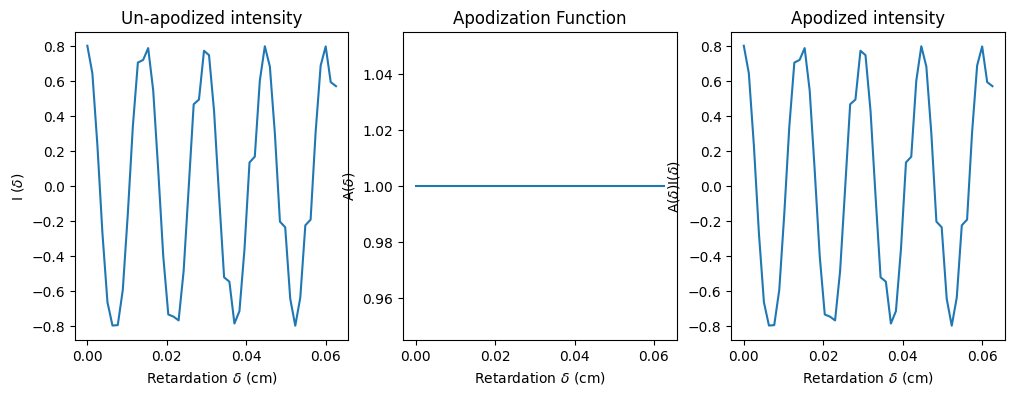

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
ax[0].plot(deltas,I_delta)
ax[1].plot(deltas,A_delta)
ax[2].plot(deltas,apodized)

You can see that the intensity functions have a lot of detail that we can't see because of scaling, so let's look at a smaller portion. The code in the below cell is identical to above, except that we have set the xlimit with the code  
a.set_xlim(0,0.02)

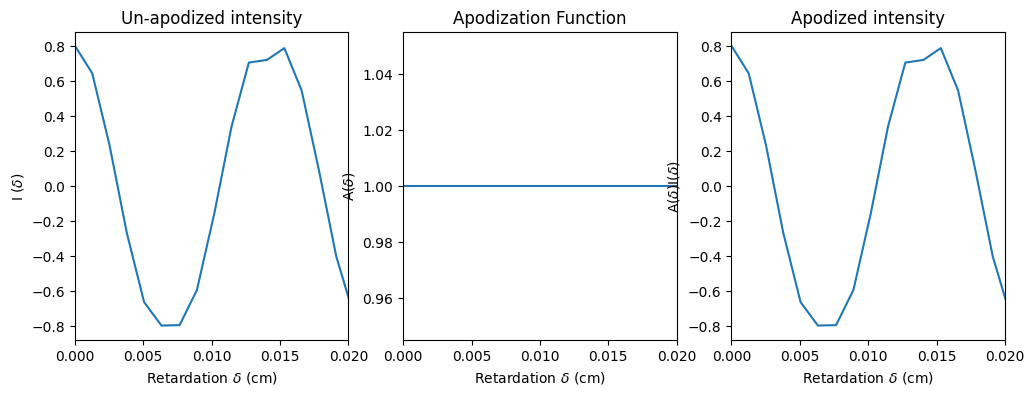

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
  a.set_xlim(0,.02)
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here (same as in above cell)
ax[0].plot(deltas,I_delta)
ax[1].plot(deltas,A_delta)
ax[2].plot(deltas,apodized)

### Adding a second wavenumber: $1500$ and $3000$ $ cm^{-1}$.  
Now that we added a second wavenumber, there is another B coefficient for the measured intensity. Here, we now have $B_{1} = 0.8$ and $B_{2}=0.5$, corresponding to the two wavenumbers, respectively.  
Equation 1 now becomes:  
<font size=4>$I(\delta) = 0.8 * cos(2\pi * 1500 * \delta) + 0.5 * cos(2\pi * 3000 * \delta)$  </font>  
Where $\delta$ is the retardance.

<font color='blue'>The biggest coding difference here is that we need to start using numpy arrays. One way to intialize them is the following:

In [ ]:
Bs = np.array([0.8,0.5]) # measures intensities
wns = np.array([1500,3000]) # wavenumber

In [ ]:
h_cm = 6.328e-5 #cm (from above)
ks = np.linspace(0,988,989)
deltas = ks * h_cm
# removed the previous single-valued B1 and wavenumber
Delta_max = (1/16) * ks[-1] # cm

Second cell: Calculate $A(\delta)$ and $I(\delta)$ and save them as variables (these variables will be numpy arrays, as in the single wavelength case). Notice that here, we calculate an interferogram at each wavenumber. To make the total interferogram, we sum them together. <font color='blue'> **This is a key point.**

In [ ]:
# your code here
I_delta = np.zeros(len(ks))
for i in range(len(Bs)):
  I_delta += Bs[i] * np.cos(2 * np.pi * wns[i] * deltas) # has to be summed up
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm))) # note that the apodization function has not changed

Third cell: Calculate $A(\delta)I(\delta)$ and save as a variable (again a numpy array)

In [ ]:
# your code here
interferogram_1500_3000 = A_delta * I_delta

Plot:

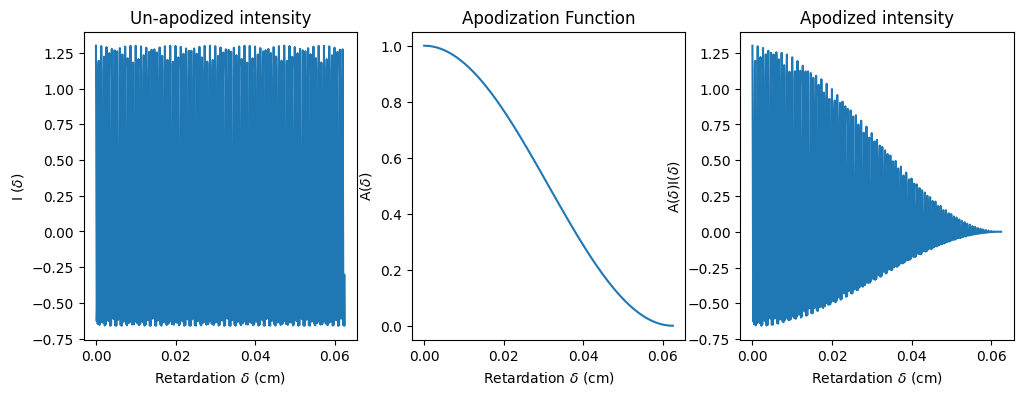

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
ax[0].plot(deltas, I_delta)
ax[1].plot(deltas, A_delta)
ax[2].plot(deltas, interferogram_1500_3000)

As in the previous case, we are plotting an identical cell, just changing the x-limits so we can see it better.

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
ax[0].plot(deltas, I_delta)
ax[1].plot(deltas, A_delta)
ax[2].plot(deltas, interferogram_1500_3000)
for a in ax:
  a.set_xlim(0,.01)

### <font color='red'> Your turn: calculate $I(\delta)~ and~ I(\delta)A(\delta)$ for a three-wavelength case, where $B_{1}$, $B_{2}$, and $B_{3}$ are equal to $0.8$, $0.5$, and $0.7$ for $1500$, $3000$, and $1000~cm^{-1}$, respectively. Note that the wavenumbers are not in sequential order; it does not matter, but they must be in the same order as their intensity coefficients (Bs).

In [ ]:
# your code here - set up numpy arrays of Bs and wavenumbers

In [ ]:
# your code here - define constants


Second cell: Calculate $A(\delta)$ and $I(\delta)$ and save them as variables (these variables will be numpy arrays). Note that the Apodization function has not and does not change regardless of the number of wavenumbers; I have just been re-calculating them in each cell for straightforwardness.

In [ ]:
# your code here


Third cell: Calculate $A(\delta)I(\delta)$ and save as a variable (again a numpy array)

In [ ]:
# your code here


Fourth cell: Plot the 3 quantities so you can see what you were working with

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
# ax[0].plot(x,y)
# ax[1].plot(x,y)
# ax[2].plot(x,y)

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for a in ax:
  a.set_xlabel('Retardation $\\delta$ (cm)')
ax[0].set_ylabel('I ($\\delta$)'); ax[1].set_ylabel('A($\\delta$)'); ax[2].set_ylabel('A($\\delta$)I($\\delta$)')
ax[0].set_title('Un-apodized intensity'); ax[1].set_title('Apodization Function'); ax[2].set_title('Apodized intensity')

# your code here
# ax[0].plot(x,y)
# ax[1].plot(x,y)
# ax[2].plot(x,y)
for a in ax:
  a.set_xlim(0,0.01)

## Exercise 3: Interferograms from real spectra
Here we will start with a real spectrum and construct its interferogram. Below are two CSV files - one for an FTIR spectrum of Polystyrene, and one for its background. Both are available in the Class Repo.

In [ ]:
file_PS = '/content/drive/MyDrive/Polystyrene.csv'
file_bg = '/content/drive/MyDrive/BackgroundSpectrum.csv'

In [ ]:
PS_loaded = pd.read_csv(file_PS,header=0)
bg_loaded = pd.read_csv(file_bg,header=0)

We've loaded these into dataframes. Let's first plot and inspect what we have loaded. Note that I have changed the x-axis limits to go from high to low wavenumber left to right, since this is how it is typically presented.

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(bg_loaded['Wavenumber'], bg_loaded['Intensity'])
ax[1].plot(PS_loaded['Wavenumber'], PS_loaded['Intensity'])

for a in ax:
    a.set_xlabel('Wavenumber $(cm^{-1})$')
    a.set_xlim(3400,300)
    a.set_ylabel('Intensity')

ax[0].set_title('Background FTIR Spectrum'); ax[1].set_title('Polystyrene FTIR Spectrum')

To simplify calculations, I am making all of the data into NumPy arrays. This results in a lot of variables, and can be done in a more elegant fashion - but we will just do this for today.

In [ ]:
n_wns_bg = np.asarray(bg_loaded['DataPoint'])
wns_bg = np.asarray(bg_loaded['Wavenumber'])
Is_bg = np.asarray(bg_loaded['Intensity'])

In [ ]:
I_delta_bg = np.zeros(len(deltas))
for i in range(len(n_wns_bg)):
  I_delta_bg += Is_bg[i] * np.cos(2 * np.pi * wns_bg[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_bg = I_delta_bg*A_delta

Calculating the interferogram for the PS

In [ ]:
n_wns_ps = np.asarray(PS_loaded['DataPoint'])
wns_ps = np.asarray(PS_loaded['Wavenumber'])
Is_ps = np.asarray(PS_loaded['Intensity'])

In [ ]:
# at each delta, we will have the sum of I_delta at all 709 wavenumbers. After we get this, we multiply it by the apodized function

In [ ]:
I_delta_ps = np.zeros(len(deltas))
for i in range(len(n_wns_ps)):
  I_delta_ps += Is_ps[i] * np.cos(2 * np.pi * wns_ps[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_ps = I_delta_ps * A_delta

Plotting both

In [ ]:
fig, ax = plt.subplots()
ax.plot(deltas, interferogram_bg,label='Background')
ax.plot(deltas, interferogram_ps,label='Polystyrene')
ax.legend()
ax.set_xlabel('Retardation $\delta$')
ax.set_ylabel('Intensity')
ax.set_title('Interferograms for measured spectra')

## Exercise 4: Turning interferograms into spectra
In the previous exercises, we worked backwards from a spectrum (the type you would see in a publication) and made a corresponding interferogram. Now, we will do what the spectrometer does, and turn the measured interferogram into a Spectrum (like you see in a publication). We will start off with a bit of math again.

The equation for the continuous Fourier Transform is:  
<font size=4>$B(\bar{\nu}) = \int_{-\infty}^{\infty}I(\delta)A(\delta)cos(2\pi\bar{/nu}\delta \cdotp d\delta)$ <font color='grey'> (Equation 3) </font>  </font>  
It requires that the retardation $\delta$ must extend from negative to positive infinity. This is impossible, which is why the apodization function needs to be applied.  
<font color='blue'>As explained earlier, the apodization function causes the interferogram intensity to decrease in a way that mimics one that extends to infinite retardation. $I(\delta)A(\delta)$ in Equation 3 is the apodized interferogram. </font>

The sampling interval impacts the resolution. The larger the sampling interval, the more information is lost when the interferogram is converted into a spectrum. This has to do with the Nyquist sampling criterion, which will be an exercise left for later.

As Equation 3 has an integral, it requires continuous sampling, which we do not do in a real experiment.  Therefore, we must use Equation 4 for discrete sampling:  
<font size=4>$B'(\bar{\nu}_1) = I_{a}(0) + 2I_{a}(1)cos(2\pi\bar{\nu_{1}} \cdotp h) + 2I_{a}(2)cos(2\pi\bar{\nu_{1}} \cdotp 2h) + ... + 2I_{a}(N-1)cos(2\pi\bar{\nu_{1}} \cdotp (N-1)h) $ <font color='grey'> (Equation 4a)

Which can be rewritten more elegantly in summation notation (we will also refer to this as Equation 4):  
<font size=4>$B'(\bar{\nu}_1) = I_{a}(0) + 2\sum_{k=1}^{N-1}I_{a}(k)cos(2\pi\bar{\nu_{1}} \cdotp kh) $ <font color='grey'> (Equation 4b) </font> </font>   
Where h is still the sampling interval determined by the wavelength as in previous sections, and N (indexed by k in this equation) is still the total number of data points in the interferogram.

### Calculate the intensity of a given test wavenumber in an interferogram.

Premise: When we take an interferogram, we are trying to determine what the dominant frequencies that show up in it are. Therefore, we want to see: are there any modes with wavenumber = $x~cm^{-1}$?

First, to illustrate, we will generate an interferogram from a single wavenumber, $1500~cm^{-1}$. This is exactly what we did above; therefore I have just copy-pasted. I have named the variable "interferogram_mystery" since we're about to "try to find out" what frequencies are in the signal.

In [ ]:
h_cm = 6.328e-5 #cm (from above)
ks = np.linspace(0,988,989)
deltas = ks * h_cm
B_1 = 0.8
wavenumber = 1500 # inv cm
Delta_max = (1/16) * ks[-1] # cm
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
I_delta = B_1 * np.cos(2 * np.pi * wavenumber * deltas)
interferogram_mystery = I_delta * A_delta

Now, let's say we want to know: Is $2000~cm^{-1}$ included in this interferogram? You and I know, since we made the interferogram from a $1500~cm^{-1}$ wavenumber, that it is not. However, we will "try". This is what your analysis code will do for each test wavenumber. Here, $2000~cm^{-1}$ is the "test wavenumber" that we want to find the intensity of. **Before** we start testing with the Fourier transform, we will plot the apodized spectrum for $2000~cm^{-1}$ on top so you know what to expect.

In [ ]:
test_wn = 2000.
I_test = 0.8 * np.cos(2 * np.pi * test_wn * deltas)
interferogram_2000 = I_test * A_delta
fig, ax = plt.subplots()
ax.plot(deltas,interferogram_1500,label='interferogram 1500')
ax.plot(deltas,interferogram_2000,label='test (2000)')
ax.set_xlim(0,0.02)
ax.set_title('A(δ)I(δ)')
ax.legend()

We can tell that this test wavenumber isn't part of the interferogram.

Next we take the product of the interferogram and the test wavenumber to see where they coincide. If the frequency is **not** contained in the interferogram,then the sum of this will be 0.

In [ ]:
test_wn = 2000
testing = 2*np.cos(2 * np.pi * test_wn * deltas) # except it's not correct for the first one
testing[0] = np.cos(2 * np.pi * test_wn * deltas[0])
testing = testing * interferogram_1500

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
for a in ax:
  a.plot(testing)
  a.set_xlabel('k')
  a.set_ylabel('tested component')

ax[1].set_xlim(0,500)
ax[2].set_xlim(0,50)
print(np.sum(testing))
plt.suptitle('Test * Apodized Interferogram (same data all 3 axes, diff scale)')

### Testing all wavenumbers for a 3-number spectrum
Now, we're going to set up systematically testing many wavenumbers in an interferogram at once. We will start with our 3-wavenumber interferogram from the 1st part.

In [ ]:
Bs = np.array([0.8,0.5, 0.7])
wns = np.array([1500,3000, 1000])

In [ ]:
# your code here
h_cm = 6.328e-5 #cm (from above)
ks = np.linspace(0,988,989)
deltas = ks * h_cm
# removed the previous single-valued B1 and wavenumber
Delta_max = (1/16) * ks[-1] # cm

In [ ]:
# your code here
I_delta = np.zeros(len(ks))
for i in range(len(Bs)):
  I_delta += Bs[i] * np.cos(2 * np.pi * wns[i] * deltas)
A_delta = 0.5 * (1 + np.cos(np.pi * deltas / (ks[-1]*h_cm)))
interferogram_3wn = A_delta * I_delta

We define a range of wavenumbers that we're going to test. We can choose the start and stop based on our instrumental limits; you can experiment with resolution.

In [ ]:
wns_to_test = np.linspace(start=500.,stop=3200.,num=28)
wns_to_test

In [ ]:
wns_to_test = np.linspace(500.,3200.,28)
rels = np.zeros(len(wns_to_test))
for i in range(len(wns_to_test)): # do this once for every wavenumber
  testing = 2*np.cos(2 * np.pi * wns_to_test[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_to_test[i] * deltas[0])
  testing = testing * interferogram_3wn
  rels[i] = np.sum(testing)

In [ ]:
fig, ax = plt.subplots()
ax.plot(wns_to_test,rels,'-o')
ax.set_xlabel('Wavenumber $(cm^{-1}$)')
ax.set_ylabel('Intensity')
ax.set_title('Frequencies that compose our 3-wavenumber interferogram')

Better resolution:

In [ ]:
wns_to_test = np.linspace(500.,3200.,200)
rels = np.zeros(len(wns_to_test))
for i in range(len(wns_to_test)):
  testing = 2*np.cos(2 * np.pi * wns_to_test[i] * deltas) # except it's not correct for the first one
  testing[0] = np.cos(2 * np.pi * wns_to_test[i] * deltas[0])
  testing = testing * interferogram_3wn
  rels[i] = np.sum(testing)
fig, ax = plt.subplots()
ax.plot(wns_to_test,rels,'-o',markersize=2)
ax.set_xlabel('Wavenumber $(cm^{-1}$)')
ax.set_ylabel('Intensity')
ax.set_title('Frequencies that compose our 3-wavenumber interferogram')

### Performing this for a real interferogram
Finally, we will convert the interferograms from Exercise 3 back into FTIR spectra. First, let's look at them:

In [ ]:
fig, ax = plt.subplots()
ax.plot(deltas, interferogram_ps,label='PS')
ax.plot(deltas, interferogram_bg,label='Background')
ax.legend()
ax.set_xlabel('Retardation $\delta$')
ax.set_ylabel('Intensity')

### Now, do the same procedure as above.
You should obtain real-looking FTIR spectra. The plotting code has been provided.

In [ ]:
# your code here - Polystyrene

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Intensity')
ax.set_xlim(3400,400)

In [ ]:
# your code here - Background

fig, ax = plt.subplots()
#ax.plot(wns_to_test,rels)
ax.set_xlabel('Wavenumbers $(cm^{-1})$')
ax.set_ylabel('Intensity')
ax.set_xlim(3400,400)

### Absorbance and Transmittance and Background Subtraction will be covered in the homework.